In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import joblib
from matplotlib.pyplot import rcParams


In [2]:
weather_data = pd.read_csv("E:\\part A A2 (1)\\prml\\WeatherForecasting\\.spyproject\\szeged_weather_data.csv")
weather_data.shape  

(96453, 12)

In [3]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
# Check for missing data
weather_data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
# Drop 'Precip Type' as it has missing values and may not be needed for this project
weather_data.drop(columns=['Precip Type'], inplace=True)

In [7]:
quantitative = weather_data.select_dtypes(include = ["int64","float64"]).keys()
weather_data[quantitative].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [8]:
quantitative

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')

array([[<Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Apparent Temperature (C)'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Wind Bearing (degrees)'}>,
        <Axes: title={'center': 'Visibility (km)'}>],
       [<Axes: title={'center': 'Loud Cover'}>,
        <Axes: title={'center': 'Pressure (millibars)'}>, <Axes: >]],
      dtype=object)

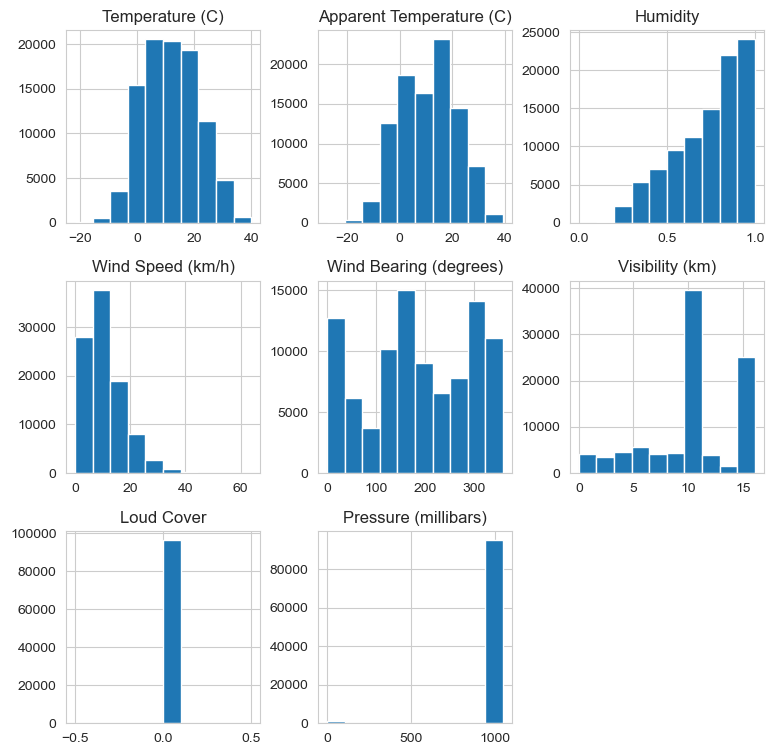

In [9]:
rcParams['figure.figsize'] = 9, 9
weather_data[quantitative].hist()

In [10]:
features = ['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']
target = 'Temperature (C)'

X = weather_data[features]
y = weather_data[target]

In [11]:
# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.52348604, 0.89      , 0.2211296 , 0.97013513],
       [0.52108359, 0.86      , 0.22339889, 0.97061297],
       [0.5531439 , 0.89      , 0.06152295, 0.97090923],
       ...,
       [0.7419435 , 0.56      , 0.14069592, 0.97064164],
       [0.73423909, 0.6       , 0.16490166, 0.97091879],
       [0.71808467, 0.61      , 0.09203227, 0.97111948]])

In [12]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor(n_neighbors=42)))
models.append(('DTM', DecisionTreeRegressor(random_state=5)))

In [14]:
score = []
mse = []
mae = []

for name, model in models:
	model.fit(X_train, y_train)
	y_pred = model.predict(X_test)
	score.append(r2_score(y_test, y_pred))
	mse.append(mean_squared_error(y_test, y_pred))
	mae.append(mean_absolute_error(y_test, y_pred))

In [15]:
results_df = pd.DataFrame({'Model': [name for name, _ in models],
                           'R-squared Score': score,
                           'Mean Squared Error': mse,
                           'Mean Absolute Error': mae})

results_df

,Model,R-squared Score,Mean Squared Error,Mean Absolute Error
0,LR,0.990216,0.901708,0.743507
1,KNN,0.998143,0.171175,0.216090
2,DTM,0.999944,0.005200,0.019767


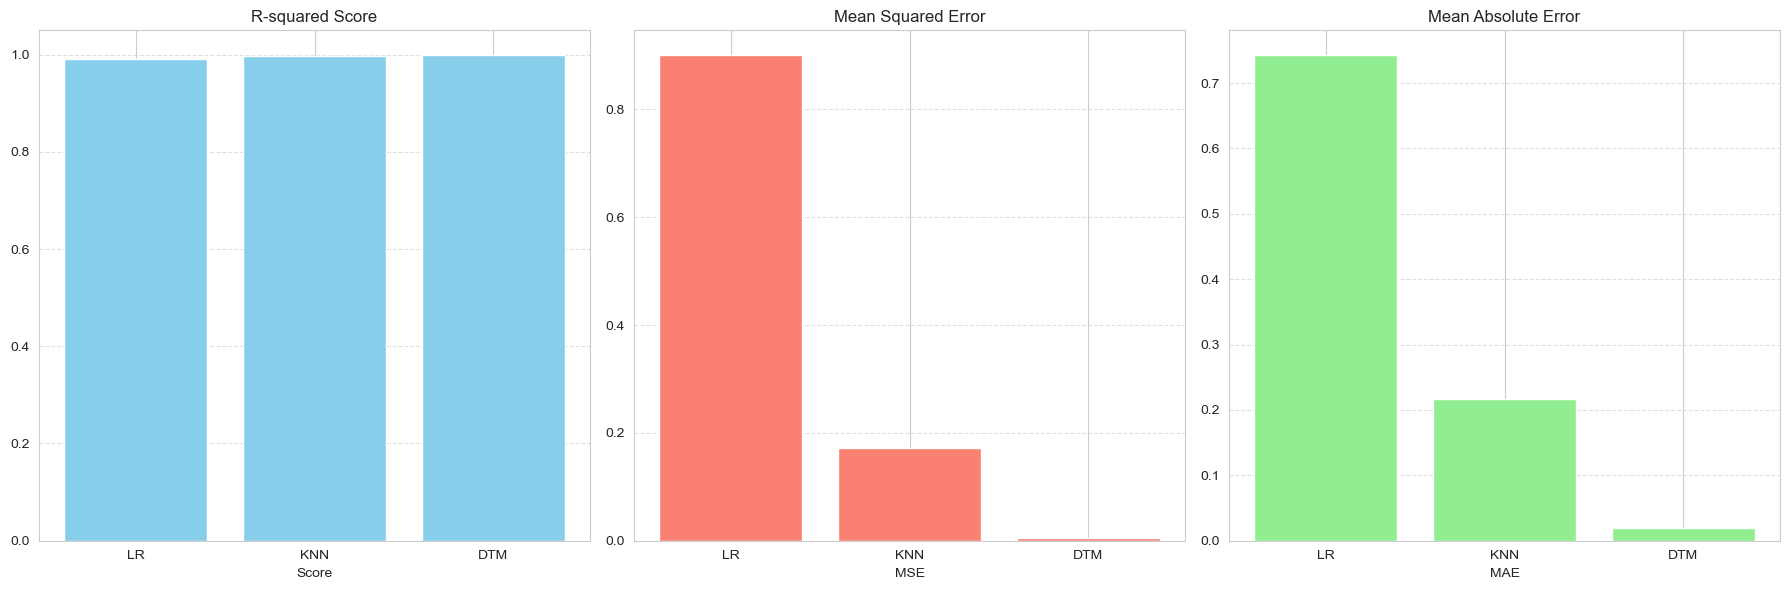

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# R-squared Score
axs[0].bar(results_df['Model'], results_df['R-squared Score'], color='skyblue')
axs[0].set_title('R-squared Score')
axs[0].set_xlabel('Score')
axs[0].grid(axis='y', linestyle='--', alpha=0.6)

# Mean Squared Error
axs[1].bar(results_df['Model'], results_df['Mean Squared Error'], color='salmon')
axs[1].set_title('Mean Squared Error')
axs[1].set_xlabel('MSE')
axs[1].grid(axis='y', linestyle='--', alpha=0.6)

# Mean Absolute Error
axs[2].bar(results_df['Model'], results_df['Mean Absolute Error'], color='lightgreen')
axs[2].set_title('Mean Absolute Error')
axs[2].set_xlabel('MAE')
axs[2].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# ASS 3


## Step 1: Evaluate Algorithms
-  Divide data for learning and test cases
-  Design a test harness to evaluate the selected algorithms on the chosen data and compare selecting with explanation the top 2 to investigate further
-  Use cross-validation to check on overfitting and whether you require approaches to deal with overfitting

In [17]:
# Divide data for learning and test cases (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In Here, we will evaluate the algorithm based on one of three metrics r2-score, mse and mae. 

First, let's analyze the strengths and weaknesses of each metric.

## Mean Squared Error (MSE):
- MSE measures the average square of the difference between the predicted value and the actual value. It represents the deviation between the prediction and the actual value.
- Suitable when you want to evaluate the accuracy of the model in predicting a specific value.
- MSE is sensitive to outliers because it calculates the square of the difference.

## Mean Absolute Error (MAE):
-   MAE measures the average absolute value of the difference between the predicted value and the actual value. It provides a view of the accuracy of the model.
-   Suitable when you want a measure of the average prediction error that is not affected by outliers.
-   MAE is less sensitive to outliers than MSE.

## R-squared (R2 score):
-   The R2 score measures how well the model explains the variance in the data. The closer the R2 value is to 1, the better the model.

-   It is useful when you are interested in how much of the dependent variable your model explains.
-   However, R2 does not reflect the specific prediction error, it only assesses the "fit" of the model.

Now, let's define find_outliers_IQR function to check outliers of dataset

In [18]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers_weather_data = find_outliers_IQR(weather_data.select_dtypes(include=['float64', 'int64']))

outliers_weather_data.dropna().sum()

Temperature (C)             0.0
Apparent Temperature (C)    0.0
Humidity                    0.0
Wind Speed (km/h)           0.0
Wind Bearing (degrees)      0.0
Visibility (km)             0.0
Loud Cover                  0.0
Pressure (millibars)        0.0
dtype: float64

As the result seen above, the dataset has no outliers, so we will choose MAE to evaluate the accuracy of the algorithm.

In [19]:
# Design a test harness to evaluate the selected algorithms on the chosen data and compare selecting with explanation the top 2 to investigate further
top_models = sorted(models, key=lambda x: mean_absolute_error(y_test, x[1].predict(X_test)), reverse=False)[:2]
top_models

[('DTM', DecisionTreeRegressor(random_state=5)),
 ('KNN', KNeighborsRegressor(n_neighbors=42))]

As the result seen above, mae of DTM (0.019) < mae of KNN (0.216). This is a pretty big difference, so we will choose DTM as the main algorithm for this assignment.

In [20]:
dtm = DecisionTreeRegressor(random_state=5)
dtm_scores = cross_val_score(dtm, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
dtm_scores

array([-0.00723608, -0.00605308, -0.00467673, -0.00677309, -0.00728073])

These small negative MSE values indicate that your Decision Tree Regressor model is performing well on the test dataset when performing cross-validation.

In [21]:
knn = KNeighborsRegressor(n_neighbors=42)
knn_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
knn_scores

array([-0.2313503 , -0.23637505, -0.17539021, -0.23081863, -0.18515299])

# Step2. Improve Results
 -  Use algorithm tuning (using parameter tuning/hyper-parameter tuning) and possible ensemble methods to further improve the selected well-performing algorithms.
  - Using GridSearch

In [22]:
# Using GridSearchCV for DTM
param_grid = {'random_state': range(10), 'splitter': ['best', 'random']} 
grid = GridSearchCV(DecisionTreeRegressor(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .....random_state=0, splitter=best;, score=1.000 total time=   0.2s
[CV 2/5] END .....random_state=0, splitter=best;, score=1.000 total time=   0.2s
[CV 3/5] END .....random_state=0, splitter=best;, score=1.000 total time=   0.2s
[CV 4/5] END .....random_state=0, splitter=best;, score=1.000 total time=   0.2s
[CV 5/5] END .....random_state=0, splitter=best;, score=1.000 total time=   0.2s
[CV 1/5] END ...random_state=0, splitter=random;, score=1.000 total time=   0.0s
[CV 2/5] END ...random_state=0, splitter=random;, score=1.000 total time=   0.0s
[CV 3/5] END ...random_state=0, splitter=random;, score=1.000 total time=   0.0s
[CV 4/5] END ...random_state=0, splitter=random;, score=1.000 total time=   0.0s
[CV 5/5] END ...random_state=0, splitter=random;, score=1.000 total time=   0.0s
[CV 1/5] END .....random_state=1, splitter=best;, score=1.000 total time=   0.1s
[CV 2/5] END .....random_state=1, splitter=best

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'random_state': range(0, 10),
                         'splitter': ['best', 'random']},
             verbose=4)

In [23]:
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)


{'random_state': 2, 'splitter': 'best'}


DecisionTreeRegressor(random_state=2)


In [24]:
# Using GridSearchCV for KNN
param_grid = {'n_neighbors': range(1, 50)} 
grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit=True, verbose=4)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.999 total time=   0.1s
[CV 2/5] END .....................n_neighbors=1;, score=0.999 total time=   0.1s
[CV 3/5] END .....................n_neighbors=1;, score=0.999 total time=   0.1s
[CV 4/5] END .....................n_neighbors=1;, score=0.999 total time=   0.1s
[CV 5/5] END .....................n_neighbors=1;, score=0.999 total time=   0.1s
[CV 1/5] END .....................n_neighbors=2;, score=0.999 total time=   0.1s
[CV 2/5] END .....................n_neighbors=2;, score=0.999 total time=   0.1s
[CV 3/5] END .....................n_neighbors=2;, score=0.999 total time=   0.1s
[CV 4/5] END .....................n_neighbors=2;, score=0.999 total time=   0.1s
[CV 5/5] END .....................n_neighbors=2;, score=0.999 total time=   0.1s
[CV 1/5] END .....................n_neighbors=3;, score=0.999 total time=   0.1s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)}, verbose=4)

In [25]:
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)

{'n_neighbors': 4}


KNeighborsRegressor(n_neighbors=4)


## Step 3. Present Results
Finalize the outcomes from the chosen learning models and determine the best performing model from the classification report. 

In [26]:
dtm = DecisionTreeRegressor(random_state=2, splitter = 'best')
knn = KNeighborsRegressor(n_neighbors=4)

In [27]:
dtm.fit(X_train, y_train)
dtm_pred = dtm.predict(X_test)
dtm_mse = mean_squared_error(y_test, dtm_pred)
dtm_mae = mean_absolute_error(y_test, dtm_pred)

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_mae = mean_absolute_error(y_test, knn_pred)

print("Decision Tree Regressor - MSE:", dtm_mse, "MAE:", dtm_mae)
print("K-Nearest Neighbors Regressor - MSE:", knn_mse, "MAE:", knn_mae)

Decision Tree Regressor - MSE: 0.004371660551744533 MAE: 0.019448908241612245
K-Nearest Neighbors Regressor - MSE: 0.07080084920941193 MAE: 0.1622878256412029


Based on the above results, it is easy to see that the DTM model is better than KNN based on the two indexes MSE and MAE.

##  Step 4. Show outcomes visualising test cases against training cases for the best performing model. 
After step 3, we have found the best model is DTM with random_state=2, splitter = 'best'. Now let's retrain the dataset with 100% data.

In [28]:
# Train the models
best_model = DecisionTreeRegressor(random_state=2, splitter='best')
best_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2)

In [29]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [30]:
# Predict on training and test data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [31]:
# Print metrics
print(f'Train MSE: {train_mse:.2f}, Train R²: {train_r2:.2f}')
print(f'Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}')

Train MSE: 0.00, Train R²: 1.00
Test MSE: 0.00, Test R²: 1.00


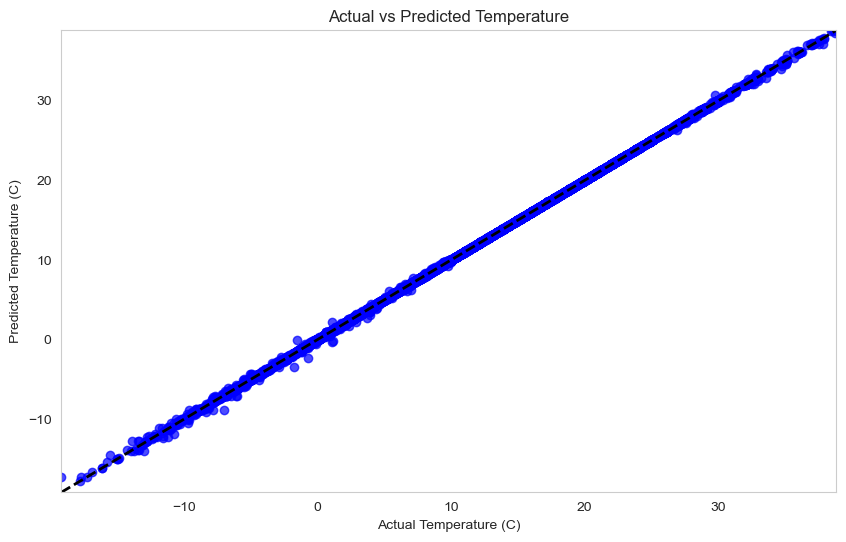

In [32]:
# Plotting Actual vs Predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Temperature (C)')
plt.ylabel('Predicted Temperature (C)')
plt.title('Actual vs Predicted Temperature')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

## Step 5. Make predictions using your optimised model for sample unseen cases and present results.
Now, let's prepare some unseen data

In [33]:
unseenData = [
    [7.8, 0.93, 10.34, 1010],
    [10.4, 0.7, 12.12, 1020],
    [12.8, 0.6, 14.12, 1030]
]
unseenData_df = pd.DataFrame(unseenData, columns=features)

unseenData_scaled = scaler.transform(unseenData_df)
unseenData_scaled

array([[0.52961644, 0.93      , 0.16193546, 0.96523252],
       [0.56838704, 0.7       , 0.18981216, 0.97478927],
       [0.6041753 , 0.6       , 0.2211343 , 0.98434603]])

In [34]:
# Make predictions for the unseen data
y_pred_unseen = best_model.predict(unseenData_scaled)

# Display the prediction results
for i, pred in enumerate(y_pred_unseen):
    print(f'Prediction for sample {i + 1}: Temperature = {pred:.2f} °C')

Prediction for sample 1: Temperature = 9.34 °C
Prediction for sample 2: Temperature = 10.40 °C
Prediction for sample 3: Temperature = 12.80 °C


Based on the results predicted by the model as well as the data in the dataset, the results reflect the actual temperature quite accurately.

## Step 6. Create a standalone model on the entire training dataset.

In [35]:
# Define features and target again
features = ['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']
target = 'Temperature (C)'

In [36]:
# Prepare the data
X = weather_data[features]
y = weather_data[target]

In [37]:
# Scale the features (optional but recommended)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# Create and fit the model
best_model = DecisionTreeRegressor(random_state=5, splitter='best')
best_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=5)

In [39]:
# Make predictions on the training set (or validation set)
y_pred = best_model.predict(X_train)
# Calculate evaluation metrics
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

In [40]:
# Print the metrics
print(f'Mean Absolute Error (MAE): {mae:.5f}')
print(f'Mean Squared Error (MSE): {mse:.5f}')
print(f'R-squared (R²): {r2:.5f}')

Mean Absolute Error (MAE): 0.00000
Mean Squared Error (MSE): 0.00000
R-squared (R²): 1.00000


The above results show that the trained model has very impressive performance.

## Step 7.  Save model for later use
Explain how this saved model can be further developed with new data and how it can be used to classify/predict outcomes for unknown cases

In [41]:
# Save the trained model to a file
joblib.dump(best_model, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

### Classifying/Predicting Outcomes for Unknown Cases

In [42]:
# Load the model from the file
loaded_model = joblib.load('decision_tree_model.pkl')
# Using the Model to Predict Outcomes
new_data = [[7.8, 0.93, 10.34, 1010]] 

new_data_df = pd.DataFrame(new_data, columns=features)

new_data_scaled = scaler.transform(new_data_df)
predicted_outcome = loaded_model.predict(new_data_scaled)

print(f'Predicted Outcome: {predicted_outcome[0]:.2f}')

Predicted Outcome: 9.34


Once the model is trained (or updated with new data), it can be used to classify or predict outcomes for unknown cases:

-   Input New Cases: Prepare new input data in the same format used for training.
-   Make Predictions: Use the trained model to make predictions
-   Interpret Results: Analyze the predictions to draw conclusions or inform decisions. 
- For example, you can predict temperature, humidity levels, or classify weather conditions based on the inputs.